In [1]:
import numpy as np
from matplotlib import pyplot as plt
from gwaxion import physics

In [2]:
bh = physics.BlackHole(mass=50, chi=0.7, msun=True)
distance = 5E6 * physics.PC_SI

In [3]:
h0rs, fgws, alphas = bh.scan_alphas(alpha_max=0.5, delta_alpha=0.001)

In [4]:
h0rs.max()

0.00492032125593456

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame({'h0r': h0rs, 'fgw': fgws, 'alpha': alphas})

In [7]:
df.head()

,alpha,fgw,h0r
0,0.001,1.292500,2.015018e-17
1,0.002,2.584999,2.544334e-15
2,0.003,3.877496,4.288474e-14
3,0.004,5.169990,3.169336e-13
4,0.005,6.462480,1.490861e-12


In [8]:
df_max = df[df['h0r']==df['h0r'].max()]
df_max['h0r'].iloc[0]

0.00492032125593456

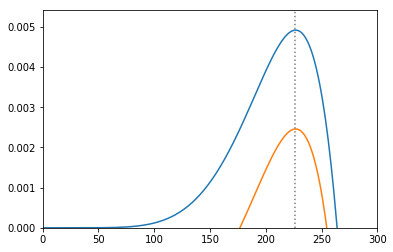

In [9]:
h0r_half_max = df['h0r'] - 0.5*df_max['h0r'].iloc[0]

plt.plot(df['fgw'], df['h0r'])
plt.plot(df['fgw'], h0r_half_max)
plt.xlim(0, 300)
plt.ylim(0, max(df['h0r'])*1.1)
plt.axvline(df_max['fgw'].iloc[0], ls=':', color='gray')
plt.show()
plt.close()

In [10]:
# find zero crossings after subtrcting half max

zero_crossings = np.where(np.diff(np.sign(h0r_half_max)))[0]

In [11]:
h0r_half_max[zero_crossings]

136   -0.000010
197    0.000004
Name: h0r, dtype: float64

In [12]:
df.iloc[zero_crossings]

,alpha,fgw,h0r
136,0.137,176.657082,0.002450
197,0.198,254.660911,0.002464


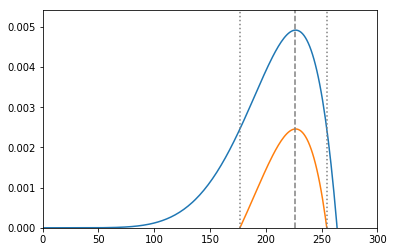

In [13]:
df_zeros = df.iloc[zero_crossings]

plt.plot(df['fgw'], df['h0r'])
plt.plot(df['fgw'], h0r_half_max)
plt.axvline(df_max['fgw'].iloc[0], ls='--', color='gray')
plt.axvline(df_zeros['fgw'].iloc[0], ls=':', color='gray')
plt.axvline(df_zeros['fgw'].iloc[1], ls=':', color='gray')
plt.xlim(0, 300)
plt.ylim(0, max(df['h0r'])*1.1)
plt.show()
plt.close()

In [14]:
# create an array of BH masses

mbhs = np.linspace(10, 1000, 10)
distance = 5E6 * physics.PC_SI

rows = []
for mbh in mbhs:
    bh = physics.BlackHole(mass=mbh, chi=0.7, msun=True)
    h0s, fgws, alphas = bh.scan_alphas(alpha_max=0.5, delta_alpha=0.0001)
    df = pd.DataFrame({'h0': h0s, 'fgw': fgws, 'alpha': alphas})
    h0max = df['h0'].max()
    h0_half_max = df['h0'] - 0.5*h0max
    zero_crossings = np.where(np.diff(np.sign(h0_half_max)))[0]
    row = {
        'mbh': mbh,
        'h0_max': h0max,
        'fgw_max': df['fgw'][df['h0']==h0max].iloc[0],
        'fgw_m': df['fgw'].iloc[zero_crossings[0]],
        'fgw_p': df['fgw'].iloc[zero_crossings[1]],
    }
    rows.append(row)
df_out = pd.DataFrame(rows)

print df_out.head()

        fgw_m      fgw_max        fgw_p    h0_max    mbh
0  883.927107  1133.634828  1273.304557  0.000984   10.0
1   73.660592    94.469569   106.108713  0.011809  120.0
2   38.431613    49.288471    55.361068  0.022634  230.0
3   25.997856    33.342201    37.450134  0.033458  340.0
4   19.642825    25.191885    28.295657  0.044283  450.0


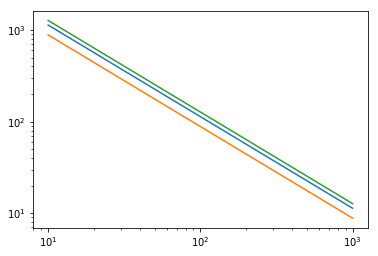

In [15]:
plt.plot(df_out['mbh'], df_out['fgw_max'])
plt.plot(df_out['mbh'], df_out['fgw_m'])
plt.plot(df_out['mbh'], df_out['fgw_p'])

plt.xscale('log')
plt.yscale('log')

plt.show()
plt.close()

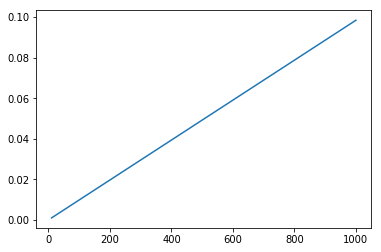

In [16]:
plt.plot(df_out['mbh'], df_out['h0_max'])

plt.show()
plt.close()

In [17]:
# create an array of BH masses

mbhs_array = np.logspace(0, 3, 500)
distance = 5E6 * physics.PC_SI

h0s, fgws, alphas, mbhs = [], [], [], []
for mbh in mbhs_array:
    bh = physics.BlackHole(mass=mbh, chi=0.7, msun=True)
    h0s_loc, fgws_loc, alphas_loc = bh.scan_alphas(alpha_max=0.5, delta_alpha=0.0001)
    mbhs = np.concatenate([mbhs, [mbh]*len(h0s_loc)])
    h0s = np.concatenate([h0s, h0s_loc])
    fgws = np.concatenate([fgws, fgws_loc])
    alphas = np.concatenate([alphas, alphas_loc])

In [18]:
df = pd.DataFrame({'h0': h0s/distance, 'fgw': fgws, 'alpha': alphas, 'mbhs': mbhs})
df = df[df['h0']>1E-30]
import matplotlib
norm = matplotlib.colors.LogNorm(vmin=df['h0'].min(), vmax=df['h0'].max())

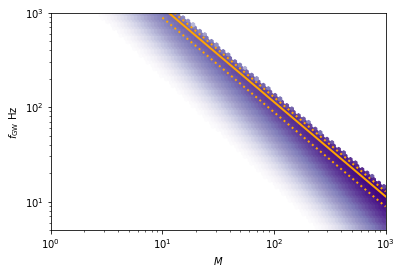

In [19]:
plt.hexbin(df['mbhs'], df['fgw'], C=df['h0'], xscale='log', yscale='log', cmap='Purples', norm=norm)
plt.ylabel(r'$f_{\rm GW}$ Hz')
plt.xlabel(r'$M~(M_\odot)$')
plt.plot(df_out['mbh'], df_out['fgw_max'], c='orange', lw=2)
plt.plot(df_out['mbh'], df_out['fgw_m'], c='orange', ls=':', lw=2)
plt.plot(df_out['mbh'], df_out['fgw_p'], c='orange', ls=':', lw=2)
plt.ylim(5, 1e3)
plt.show()
plt.close()

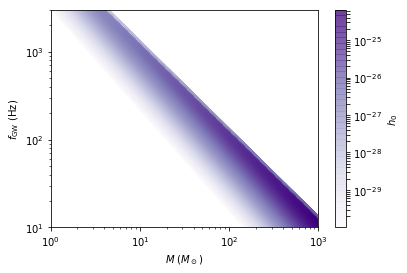

In [20]:
ax = plt.scatter(df['mbhs'], df['fgw'], c=df['h0'], alpha=0.5, norm=norm, s=1, cmap='Purples')
cb = plt.colorbar(ax, label=r'$h_0$', norm=norm)
# plt.plot(df_out['mbh'], df_out['fgw_max'], c='orange', lw=2, alpha=0.5)
# plt.plot(df_out['mbh'], df_out['fgw_m'], c='orange', ls=':', lw=2, alpha=0.5)
# plt.plot(df_out['mbh'], df_out['fgw_p'], c='orange', ls=':', lw=2, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$M$ ($M_\odot$)')
plt.xlim(1, 1e3)
plt.ylim(10, 3e3)
plt.show()
plt.close()

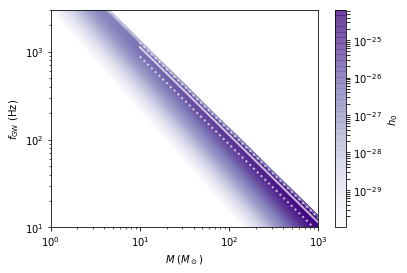

In [21]:
ax = plt.scatter(df['mbhs'], df['fgw'], c=df['h0'], alpha=0.5, norm=norm, s=1, cmap='Purples')
cb = plt.colorbar(ax, label=r'$h_0$', norm=norm)
plt.plot(df_out['mbh'], df_out['fgw_max'], c='white', lw=2, alpha=0.7)
plt.plot(df_out['mbh'], df_out['fgw_m'], c='white', ls=':', lw=2, alpha=0.7)
plt.plot(df_out['mbh'], df_out['fgw_p'], c='white', ls=':', lw=2, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$M$ ($M_\odot$)')
plt.xlim(1, 1e3)
plt.ylim(10, 3e3)
plt.savefig('axion.pdf', bbox_inches='tight')
plt.show()
plt.close()

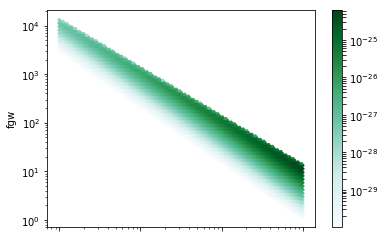

In [22]:
df.plot.hexbin(x='mbhs', y='fgw', C='h0', xscale='log', yscale='log', norm=norm)
plt.show()

In [23]:
df2 = df[['fgw', 'h0', 'mbhs']].pivot(index='fgw', columns='mbhs', values='h0')
print df2.head()

mbhs      1.000000     1.013939     1.028073     1.042404     1.056935     \
fgw                                                                         
1.124433          NaN          NaN          NaN          NaN          NaN   
1.130894          NaN          NaN          NaN          NaN          NaN   
1.137356          NaN          NaN          NaN          NaN          NaN   
1.143818          NaN          NaN          NaN          NaN          NaN   
1.146658          NaN          NaN          NaN          NaN          NaN   

mbhs      1.071668     1.086606     1.101753     1.117111     1.132683     \
fgw                                                                         
1.124433          NaN          NaN          NaN          NaN          NaN   
1.130894          NaN          NaN          NaN          NaN          NaN   
1.137356          NaN          NaN          NaN          NaN          NaN   
1.143818          NaN          NaN          NaN          NaN          NaN  

In [2]:
df3 = df2.fillna(0)

NameError: name 'df2' is not defined

In [1]:
x = df3.columns.values
y = df3.index.values
X, Y = np.meshgrid(x, y)
Z = df3.values

NameError: name 'df3' is not defined

In [ ]:
plt.contour(np.log(Y), np.log(X), Z, colors='black');
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

In [ ]:
# try new method